<a href="https://www.kaggle.com/code/ramanyazdi/random-forests?scriptVersionId=138134215" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1>Random Forests</h1>

It is essential to know decision tree model before studying Random Forests. Trees have one aspect that prevents them from being the ideal tool for predictive learning, namly **inaccuracy**

In the other words, they work great with the data used to create them, but **they are not flexible when it comes to classifying new samples**

**Random Forest** combine the simplicity of decision trees with flexibility resulting in a vast improvment in accuracy. 

Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.
Random forests has a variety of applications, such as 
- **recommendation engines**
- **image classification**
- **feature selection**
- **classify loyal loan applicants**
- **identify fraudulent activity**
- **predict diseases**

Imagine you have a complex problem to solve, and you gather a group of experts from different fields to provide their input. Each expert provides their opinion based on their expertise and experience. Then, the experts would vote to arrive at a final decision.

In a random forest classification, multiple decision trees are created using different random subsets of the data and features. Each decision tree is like an expert, providing its opinion on how to classify the data. Predictions are made by calculating the prediction for each decision tree, then taking the most popular result. (For regression, predictions use an averaging technique instead.)

In the diagram below, we have a random forest with n decision trees, and we’ve shown the first 5, along with their predictions (either “Dog” or “Cat”). Each tree is exposed to a different number of features and a different sample of the original dataset, and as such, every tree can be different. Each tree makes a prediction. Looking at the first 5 trees, we can see that 4/5 predicted the sample was a Cat. The green circles indicate a hypothetical path the tree took to reach its decision. The random forest would count the number of predictions from decision trees for Cat and for Dog, and choose the most popular prediction.


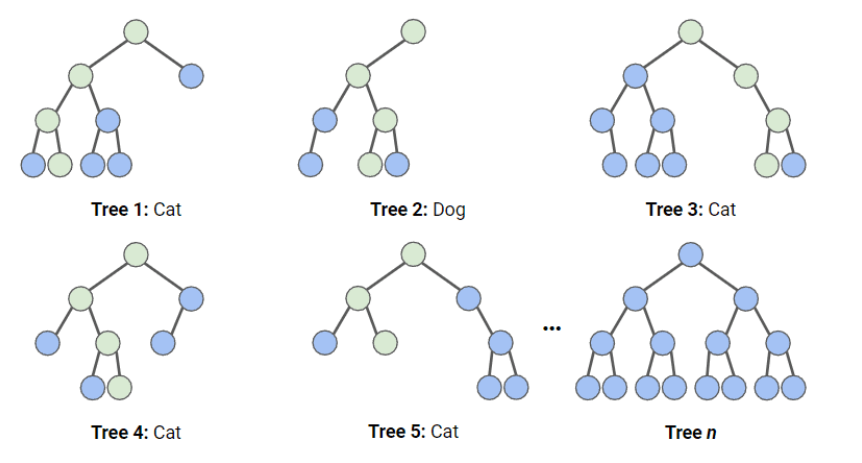

<h2>Importing Packages</h2>
The following packages and functions are used in this tutorial:

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

<h2>The Dataset</h2>
This dataset consists of direct marketing campaigns by a Portuguese banking institution using phone calls. The campaigns aimed to sell subscriptions to a bank term deposit. We are going to store this dataset in a variable called bank_data. 

The columns we will use are:

- **age :** The age of the person who received the phone call
- **default :** Whether the person has credit in default
- **cons.price.idx :** Consumer price index score at the time of the call (The Consumer Price Index (CPI) measures the change in prices paid by consumers for goods and services).
- **cons.conf.idx :** Consumer confidence index score at the time of the call (The CCI measures and compares how consumers view the overall economy, business conditions, and labor market presently and over the next six months. The CCI infers that when consumers are optimistic, they spend more, stimulating the economy, but when pessimistic, spending declines). 
- **y :** Whether the person subscribed (this is what we’re trying to predict)

In [2]:
# Reading dataset
bank_data = pd.read_csv("/kaggle/input/bankadditionalfullcsv/bank-additional-full.csv", delimiter=';')
# Select needed column 
bank_data = bank_data[['age', 'default', 'cons.price.idx','cons.conf.idx','y']]
bank_data.info()
bank_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   default         41188 non-null  object 
 2   cons.price.idx  41188 non-null  float64
 3   cons.conf.idx   41188 non-null  float64
 4   y               41188 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.6+ MB


,age,default,cons.price.idx,cons.conf.idx,y
0,56,no,93.994,-36.4,no
1,57,unknown,93.994,-36.4,no
2,37,no,93.994,-36.4,no
3,40,no,93.994,-36.4,no
4,56,no,93.994,-36.4,no


<h2>Random Forests Workflow</h2>
As our data is pretty clean, we won’t be carrying out every step. We will do the following:

- Feature engineering
- Split the data
- Train the model
- Hyperparameter tuning
- Assess model performance

<h2>Preprocessing Data for Random Forests</h2>
Tree-based models are much more robust to outliers than linear models, and they do not need variables to be normalized to work. As such, we need to do very little preprocessing on our data.

- We will map our ‘default’ column, which contains no and yes, to 0s and 1s, respectively. We will treat unknown values as no for this example.
- We will also map our target, y, to 1s and 0s.

In [3]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})
bank_data.head()

,age,default,cons.price.idx,cons.conf.idx,y
0,56,0,93.994,-36.4,0
1,57,0,93.994,-36.4,0
2,37,0,93.994,-36.4,0
3,40,0,93.994,-36.4,0
4,56,0,93.994,-36.4,0


<h2>Splitting the Data</h2>
When training any supervised learning model, it is important to split the data into training and test data. The training data is used to fit the model. The algorithm uses the training data to learn the relationship between the features and the target. The test data is used to evaluate the performance of the model.

The code below splits the data into separate variables for the features and target, then splits into training and test data.

In [4]:
# Split the data into features (X) and target (y)
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h2>Fitting and Evaluating the Model</h2>
We first create an instance of the Random Forest model, with the default parameters. We then fit this to our training data. We pass both the features and the target variable, so the model can learn.

In [5]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

At this point, we have a trained Random Forest model, but we need to find out whether it is making accurate predictions.

In [6]:
y_pred = rf.predict(X_test)

The simplest way to evaluate this model is using accuracy; we check the predictions against the actual values in the test set and count up how many the model got right.

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8838310269482884


This is a pretty good score! However, we may be able to do better by optimizing our hyperparameters. 

<h2>Visualizing the Results</h2>
We can use the following code to visualize our first 3 trees.

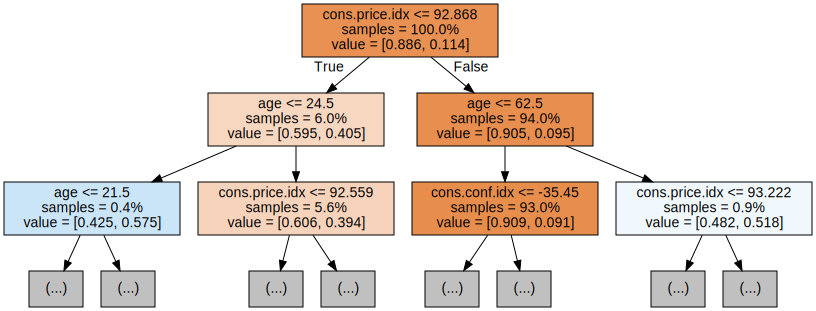

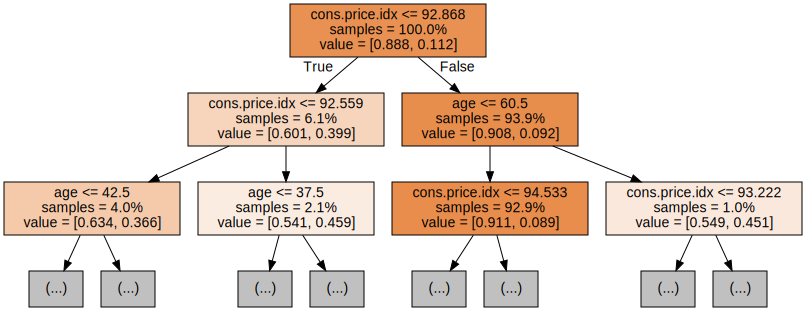

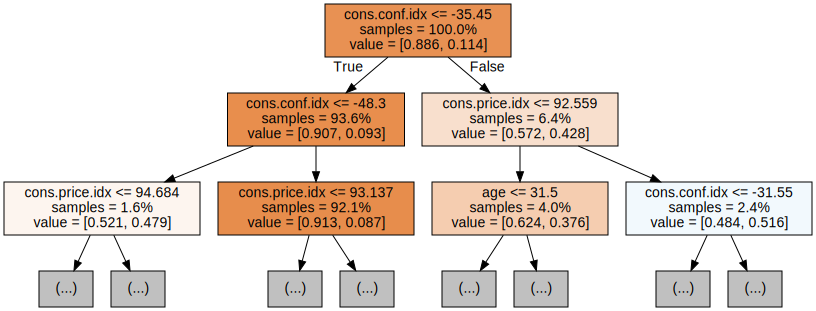

In [8]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Each tree image is limited to only showing the first few nodes. These trees can get very large and difficult to visualize. The colors represent the majority class of each node (box, with red indicating majority 0 (no subscription) and blue indicating majority 1 (subscription). The colors get darker the closer the node gets to being fully 0 or 1. Each node also contains the following information:

- The variable name and value used for splitting
- The % of total samples in each split
- The % split between classes in each split

<h2>Hyperparameter Tuning</h2>

The code below uses Scikit-Learn’s [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
 , which will randomly search parameters within a range per hyperparameter. We define the hyperparameters to use and their ranges in the param_dist dictionary. In our case, we are using:

- **n_estimators:** the number of decision trees in the forest. Increasing this hyperparameter generally improves the performance of the model but also increases the computational cost of training and predicting.
- **max_depth:** the maximum depth of each decision tree in the forest. Setting a higher value for max_depth can lead to overfitting while setting it too low can lead to underfitting.




In [9]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ae402ba5bd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ae402ba57d0>})

RandomizedSearchCV will train many models (defined by n_iter_ and save each one as variables, the code below creates a variable for the best model and prints the hyperparameters. In this case, we haven’t passed a scoring system to the function, so it defaults to accuracy. This function also uses cross validation, which means it splits the data into five equal-sized groups and uses 4 to train and 1 to test the result. It will loop through each group and give an accuracy score, which is averaged to find the best model.

In [10]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 291}


<h2>More Evaluation Metrics</h2>

Let’s look at the confusion matrix. This plots what the model predicted against what the correct prediction was. We can use this to understand the tradeoff between false positives (top right) and false negatives(bottom left) We can plot the confusion matrix using this code:

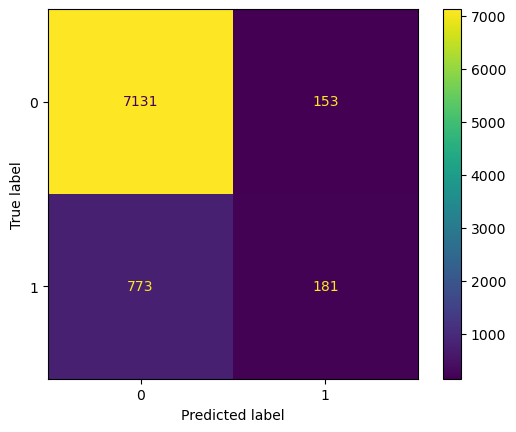

In [11]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

We should also evaluate the best model with accuracy, precision, and recall (note your results may differ due to randomization)

In [12]:
# create an instance of the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# train the classifier on your training data
knn.fit(X_train, y_train)

# use the classifier to make predictions on your test data
y_pred = knn.predict(X_test)

# calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8832240835154164
Precision: 0.49203187250996017
Recall: 0.2589098532494759


The below code plots the importance of each feature, using the model’s internal score to find the best way to split the data within each decision tree.

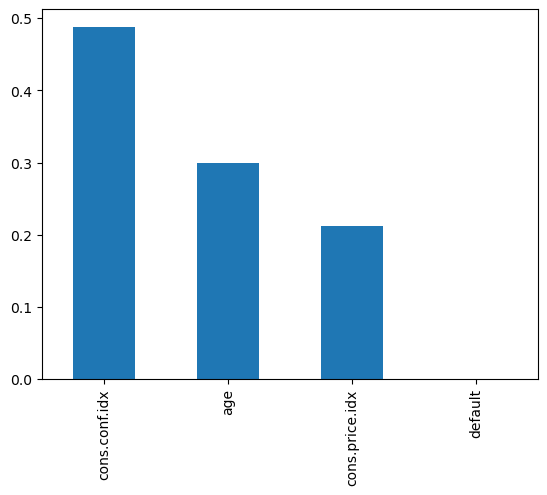

In [13]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();